In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from linearmodels import PanelOLS

In [2]:
user_path = '/Users/allanbellahsene/Desktop/'
file_name = 'co-emissions-per-capita-vs-gdp-per-capita-international-.csv'
common_path = 'THESIS/DATA/OUR_WORLD_IN_DATA/' + file_name
total_path = user_path + common_path
data = pd.read_csv(total_path)

In [3]:
data

,Entity,Code,Year,CO₂ emissions per capita (tonnes per capita),GDP per capita (international-$ (in 2011 prices)),Total population (Gapminder)
0,Afghanistan,AFG,1800,NaN,NaN,3280000.0
1,Afghanistan,AFG,1801,NaN,NaN,3280000.0
2,Afghanistan,AFG,1802,NaN,NaN,3280000.0
3,Afghanistan,AFG,1803,NaN,NaN,3280000.0
4,Afghanistan,AFG,1804,NaN,NaN,3280000.0
...,...,...,...,...,...,...
49560,Zimbabwe,ZWE,2015,0.691341,1560.0,13815000.0
49561,Zimbabwe,ZWE,2016,0.615011,1534.0,14030000.0
49562,Zimbabwe,ZWE,2017,0.629025,NaN,14237000.0
49563,Zimbabwe,ZWE,2018,NaN,NaN,14439000.0


In [4]:
data.Year = pd.to_datetime(data.Year, errors='coerce')
data.dropna(subset=['Year'], inplace=True)
data = data.loc[data.Year>='1850']

In [5]:
data.columns

Index(['Entity', 'Code', 'Year',
       'CO₂ emissions per capita (tonnes per capita)',
       'GDP per capita (international-$ (in 2011 prices))',
       'Total population (Gapminder)'],
      dtype='object')

In [6]:
data.head()

,Entity,Code,Year,CO₂ emissions per capita (tonnes per capita),GDP per capita (international-$ (in 2011 prices)),Total population (Gapminder)
50,Afghanistan,AFG,1850-01-01,NaN,NaN,3810047.0
51,Afghanistan,AFG,1851-01-01,NaN,NaN,3826140.0
52,Afghanistan,AFG,1852-01-01,NaN,NaN,3842299.0
53,Afghanistan,AFG,1853-01-01,NaN,NaN,3858524.0
54,Afghanistan,AFG,1854-01-01,NaN,NaN,3874815.0


In [7]:
panel_data=data.pivot_table(index='Year', values=['CO₂ emissions per capita (tonnes per capita)',
                                                 'GDP per capita (international-$ (in 2011 prices))',
                                                  'Total population (Gapminder)'], 
                            columns=['Entity'])
sub_data1 = panel_data['GDP per capita (international-$ (in 2011 prices))']
sub_data2 = panel_data['CO₂ emissions per capita (tonnes per capita)']

                       

In [119]:
from sklearn.linear_model import LinearRegression

In [135]:
def linear_regression(output_data, input_data, country):
    from sklearn.linear_model import LinearRegression
    subdata = pd.merge(output_data[country], input_data[country], left_index=True, right_index=True)
    subdata.rename(columns={country + '_x': country + ' CO2 emissions per Capita', country+'_y': country+' GDP per Capita'}, inplace=True)
    subdata.dropna(inplace=True)
    Y = subdata[country+' CO2 emissions per Capita'].pct_change().dropna().values.reshape(-1,1)
    X = subdata[country+' GDP per Capita'].pct_change().dropna().values.reshape(-1,1)
    model = LinearRegression().fit(X,Y)
    Y_pred = model.predict(X)
    R_squared = model.score(X,Y)
    alpha, beta = [model.intercept_[0], model.coef_[0]]
    plt.scatter(X,Y)
    plt.plot(X,Y_pred, color='red')
    plt.xlabel('GDP per Capita')
    plt.ylabel('CO2 emissions per Capita')
    plt.legend(['y = ' + str(round(alpha,5)) + '+ ' + str(round(float(beta), 4)) + 'X'])
    plt.title('Linear Regression of $CO_2$ variation emissions against GDP growth for ' + country + ', $R^2$ = ' + str(R_squared))

    
    

In [148]:
country = 'China'
output_data = sub_data2
input_data = sub_data1
subdata = pd.merge(output_data[country], input_data[country], left_index=True, right_index=True)
subdata.rename(columns={country + '_x': country + ' CO2 emissions per Capita', country+'_y': country+' GDP per Capita'}, inplace=True)
subdata.dropna(inplace=True)

In [155]:
Y = subdata[country+' CO2 emissions per Capita'].pct_change().dropna()
X = subdata[country+' GDP per Capita'].pct_change().dropna()

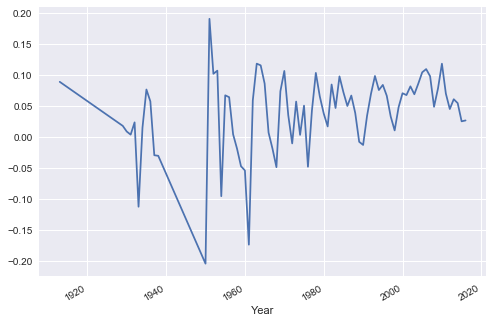

In [158]:
X.plot()

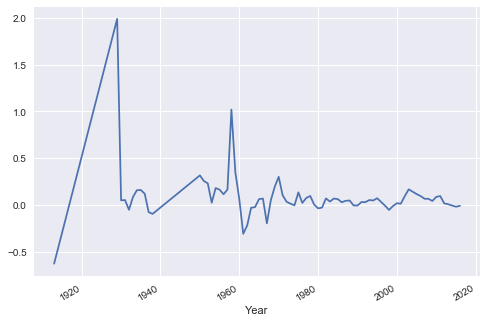

In [160]:
Y.plot()

Text(0.5, 1.0, 'China GDP per capita per year')

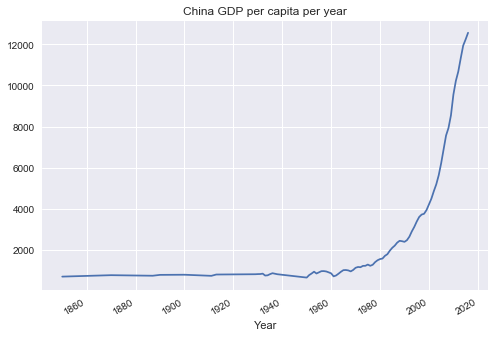

In [162]:
sub_data1['China'].dropna().plot()
plt.title('China GDP per capita per year')

Text(0.5, 1.0, 'China C02 emissions per capita per year')

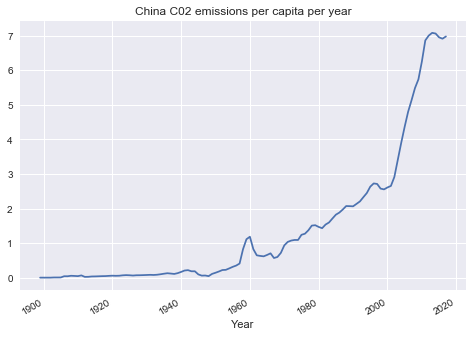

In [163]:
sub_data2['China'].dropna().plot()
plt.title('China C02 emissions per capita per year')

In [165]:
print(sub_data2['China'])

Year
1850-01-01         NaN
1851-01-01         NaN
1852-01-01         NaN
1853-01-01         NaN
1854-01-01         NaN
                ...   
2015-01-01    6.955096
2016-01-01    6.914483
2017-01-01    6.980229
2018-01-01         NaN
2019-01-01         NaN
Name: China, Length: 170, dtype: float64


In [10]:
sub_data1.sum?

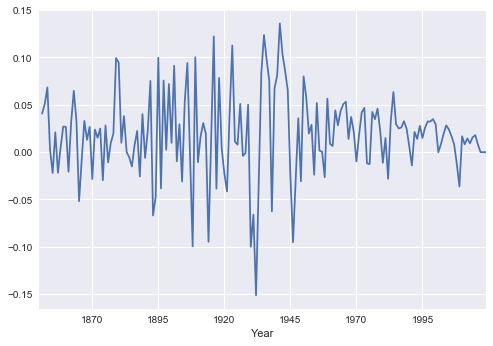

In [74]:
sub_data1['United States'].pct_change().plot()

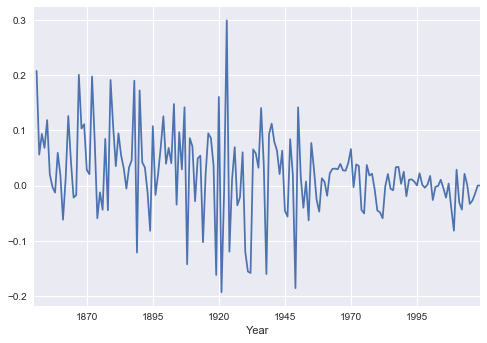

In [75]:
sub_data2['United States'].pct_change().plot()

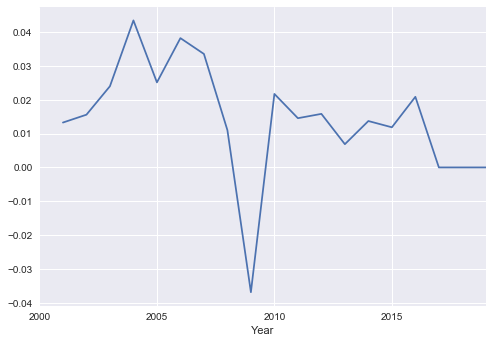

In [25]:
sub_data1.loc[sub_data1.index>='2000'].mean(axis=1).pct_change().plot()

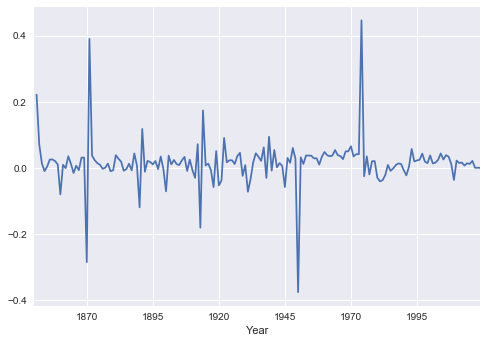

In [16]:
sub_data1.mean(axis=1).pct_change().plot()

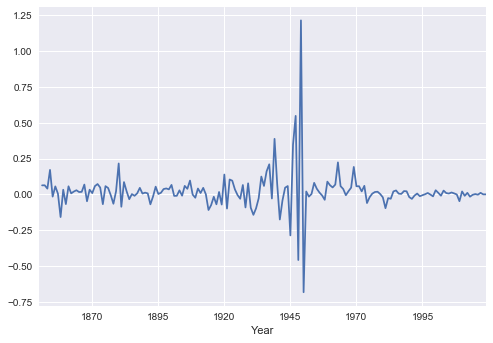

In [26]:
sub_data2.mean(axis=1).pct_change().plot()

In [103]:
pd.merge?

In [107]:
subdata = pd.merge(sub_data2['France'], sub_data1['France'], left_index=True, right_index=True)
subdata.rename(columns={'France_x': 'France CO2 emissions per Capita', 'France_y': 'France GDP per Capita'}, inplace=True)
subdata.dropna(inplace=True)

In [109]:
subdata.dropna(inplace=True)

In [117]:
subdata['France CO2 emissions per Capita'].pct_change().dropna()

Year
1851-01-01    0.018116
1852-01-01    0.072939
1853-01-01    0.170946
1854-01-01    0.149087
1855-01-01    0.128404
                ...   
2012-01-01   -0.001131
2013-01-01   -0.003993
2014-01-01   -0.085863
2015-01-01    0.009172
2016-01-01    0.001481
Name: France CO2 emissions per Capita, Length: 166, dtype: float64

In [88]:
Y_ = sub_data2['France'].dropna()
X_ = sub_data1['France'].dropna()


In [89]:
Y_

Year
1850-01-01    0.540744
1851-01-01    0.550540
1852-01-01    0.590696
1853-01-01    0.691673
1854-01-01    0.794792
                ...   
2013-01-01    5.855117
2014-01-01    5.352379
2015-01-01    5.401471
2016-01-01    5.409471
2017-01-01    5.483274
Name: France, Length: 168, dtype: float64

In [90]:
X_

Year
1850-01-01     2627.0
1851-01-01     2579.0
1852-01-01     2738.0
1853-01-01     2596.0
1854-01-01     2711.0
               ...   
2012-01-01    36571.0
2013-01-01    36632.0
2014-01-01    36527.0
2015-01-01    36827.0
2016-01-01    37124.0
Name: France, Length: 167, dtype: float64

In [91]:
Y_ = Y_[:-3]
X_ = X_[:-2]

In [92]:
Y = Y_.pct_change()
X = X_.pct_change()

In [93]:
X

Year
1850-01-01         NaN
1851-01-01   -0.018272
1852-01-01    0.061652
1853-01-01   -0.051863
1854-01-01    0.044299
                ...   
2010-01-01    0.014000
2011-01-01    0.015218
2012-01-01   -0.003271
2013-01-01    0.001668
2014-01-01   -0.002866
Name: France, Length: 165, dtype: float64

In [94]:
Y

Year
1850-01-01         NaN
1851-01-01    0.018116
1852-01-01    0.072939
1853-01-01    0.170946
1854-01-01    0.149087
                ...   
2010-01-01    0.022786
2011-01-01   -0.067787
2012-01-01   -0.001131
2013-01-01   -0.003993
2014-01-01   -0.085863
Name: France, Length: 165, dtype: float64

Text(0, 0.5, 'CO2 emissions World variation')

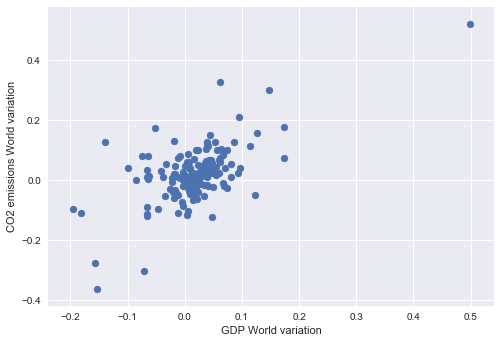

In [95]:
plt.scatter(X.dropna(),Y.dropna())
plt.xlabel('GDP World variation')
plt.ylabel('CO2 emissions World variation')

In [99]:
import statsmodels.api as sm
Y.dropna(inplace=True)
X.dropna(inplace=True)
#X = sm.add_constant(X)
mod = sm.OLS(Y,X)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 France   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     103.7
Date:                Fri, 08 May 2020   Prob (F-statistic):           3.86e-19
Time:                        17:13:07   Log-Likelihood:                 199.86
No. Observations:                 164   AIC:                            -395.7
Df Residuals:                     162   BIC:                            -389.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0025      0.006      0.434      0.6

Text(0.5, 1.0, 'Average World GDP per capita evolution')

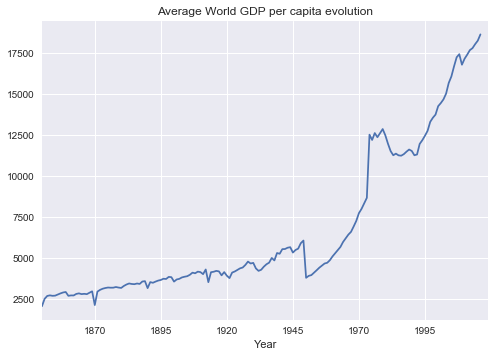

In [8]:
sub_data1.mean(axis=1).plot()
plt.title('Average World GDP per capita evolution')

Text(0.5, 1.0, 'Average World $CO_2$ emissions per capita evolution')

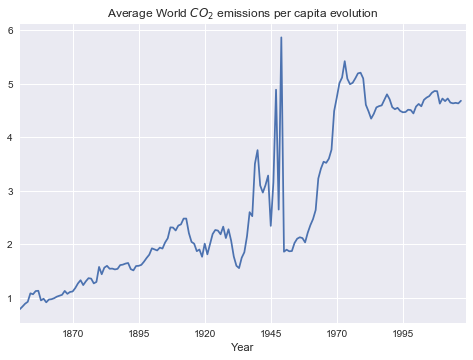

In [9]:
sub_data2.mean(axis=1).plot()
plt.title('Average World $CO_2$ emissions per capita evolution')

Text(0, 0.5, 'Global Average GDP Per Capita (2011 USD)')

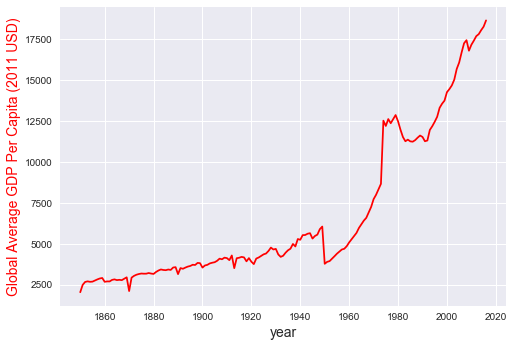

In [10]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(sub_data1.index, sub_data1.mean(axis=1), color="red")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("Global Average GDP Per Capita (2011 USD)",color="red",fontsize=14)

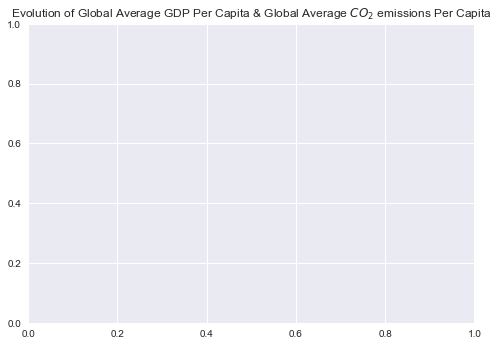

In [11]:
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(sub_data2.index, sub_data2.mean(axis=1),color="blue")
ax2.set_ylabel("Global Average $CO_2$ emissions (tonnes Per Capita)",color="blue",fontsize=14)
plt.title('Evolution of Global Average GDP Per Capita & Global Average $CO_2$ emissions Per Capita')
# save the plot as a file
fig.savefig('GDP&C02Evolutions.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')
plt.show()

In [12]:
panel_data

CO₂ emissions per capita (tonnes per capita)                      \
Entity                                      Afghanistan   Albania   Algeria   
Year                                                                          
1850-01-01                                          NaN       NaN       NaN   
1851-01-01                                          NaN       NaN       NaN   
1852-01-01                                          NaN       NaN       NaN   
1853-01-01                                          NaN       NaN       NaN   
1854-01-01                                          NaN       NaN       NaN   
...                                                 ...       ...       ...   
2015-01-01                                     0.299599  2.034556  3.776943   
2016-01-01                                     0.353702  2.143579  3.703340   
2017-01-01                                     0.366302  2.177065  3.643711   
2018-01-01                                          NaN       NaN       NaN   
2019-01-01                                          NaN       NaN       NaN   

                                                                        \
Entity       Andorra    Angola Antigua and Barbuda Argentina   Armenia   
Year                                                                     
1850-01-01       NaN       NaN                 NaN       NaN       NaN   
1851-01-01       NaN       NaN                 NaN       NaN       NaN   
1852-01-01       NaN       NaN                 NaN       NaN       NaN   
1853-01-01       NaN       NaN                 NaN       NaN       NaN   
1854-01-01       NaN       NaN                 NaN       NaN       NaN   
...              ...       ...                 ...       ...       ...   
2015-01-01  6.117346  1.247739            5.550593  4.753077  1.985543   
2016-01-01  6.618792  1.226892            5.600040  4.722376  2.038013   
2017-01-01  6.758706  1.188212            5.541470  4.615284  1.930213   
2018-01-01       NaN       NaN                 NaN       NaN       NaN   
2019-01-01       NaN       NaN                 NaN       NaN       NaN   

                                 ... Total population (Gapminder)          \
Entity      Australia   Austria  ...                      Vanuatu Vatican   
Year                             ...                                        
1850-01-01        NaN  0.587147  ...                      31490.0   905.0   
1851-01-01        NaN  0.585150  ...                      31618.0   905.0   
1852-01-01        NaN  0.699948  ...                      31746.0   905.0   
1853-01-01        NaN  0.797781  ...                      31875.0   905.0   
1854-01-01        NaN  0.780798  ...                      32004.0   906.0   
...               ...       ...  ...                          ...     ...   
2015-01-01  16.932898  7.685980  ...                     271000.0  1000.0   
2016-01-01  17.133902  7.736573  ...                     278000.0  1000.0   
2017-01-01  16.895017  8.006655  ...                     285000.0  1000.0   
2018-01-01        NaN       NaN  ...                     293000.0  1000.0   
2019-01-01        NaN       NaN  ...                     300000.0  1000.0   

                                                                     \
Entity       Venezuela     Vietnam Wallis and Futuna Western Sahara   
Year                                                                  
1850-01-01   1298076.0   8722624.0               NaN            NaN   
1851-01-01   1319478.0   8789275.0               NaN            NaN   
1852-01-01   1340662.0   8856404.0               NaN            NaN   
1853-01-01   1361614.0   8924015.0               NaN            NaN   
1854-01-01   1382320.0   8992109.0               NaN            NaN   
...                ...         ...               ...            ...   
2015-01-01  30082000.0  92677000.0           12000.0       526000.0   
2016-01-01  29851000.0  93640000.0           12000.0       539000.0   
2017-01